# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

**AI-generated notebook:**  
This notebook was automatically generated by an AI system and has not been manually verified. Please use caution when interpreting any code, output, or results—always cross-check with official documentation and your own expertise.

## Overview

This notebook provides an exploratory introduction to [Dandiset 001433, "Breathing rhythm and place dataset"](https://dandiarchive.org/dandiset/001433/0.250507.2356). This dataset consists of behavioral and olfactory bulb electrophysiology recordings in freely-behaving mice, including sniff (thermistor) signals and local field potential (LFP) data from multiple channels. The data aim to enable analyses of brain and breathing dynamics in the absence of any explicit task or stimulus.

### Summary of contents

- Dandiset and NWB file metadata summary
- How to access this Dandiset programmatically using the DANDI API and PyNWB
- Overview of core data structures (LFP, sniffing, events, electrodes, subject)
- Step-by-step loading and exploration of raw signals and event features
- Example code for producing useful and interpretable visualizations

For more information or citation, please reference:  
Breathing rhythm and place dataset (2025). (Version 0.250507.2356) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001433/0.250507.2356

## License  
This Dandiset is distributed under a [CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/) license.

---

## Required packages

This notebook assumes the following packages are already installed in your environment:

- numpy
- pandas
- matplotlib
- pynwb
- h5py
- remfile
- dandi

---

## Dandiset Metadata Summary

**Name:** Breathing rhythm and place dataset  
**Contributors:** National Institutes of Health (NIH), Smear, Matt  
**Description:**  
These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task.  
**Techniques:** surgical technique, multi electrode extracellular electrophysiology recording technique, analytical technique  
**Institution:** University of Oregon  
**Lab:** Smear lab  
**Version:** 0.250507.2356  

## How to Access the Dandiset and List Assets

We will use the DANDI API to connect to the archive and list available files in the Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## Selecting and Summarizing an NWB File

For this demonstration we will focus on one representative session file:

**File path:** `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`  
**Asset URL:**  
https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/

[View this NWB file on NeuroSift ↗](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=draft)

Below, we show how to programmatically load this file using PyNWB, h5py, and remfile.

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Experimenter:", nwb.experimenter)
print("Session start time:", nwb.session_start_time)
print("File create date:", nwb.file_create_date)
print("Experiment description:", getattr(nwb, 'experiment_description', ''))
print("Lab:", getattr(nwb, 'lab', ''))
print("Institution:", getattr(nwb, 'institution', ''))
print("Subject info:")
subject = nwb.subject
for k in ['description', 'species', 'sex', 'age', 'subject_id']:
    print(f"  {k}: {getattr(subject, k, None)}")
print("Keywords:", nwb.keywords[:])

Session: LFP and sniff recording
Identifier: 4122_4
Experimenter: ('Rafilson, Sidney',)
Session start time: 2025-05-07 15:29:27.359523-07:00
File create date: [datetime.datetime(2025, 5, 7, 15, 29, 27, 359523, tzinfo=tzoffset(None, -25200))]
Experiment description: LFP and sniff behavior recording
Lab: Smear lab
Institution: University of Oregon
Subject info:
  description: Lab mouse used for sniffing + LFP experiment
  species: Mus musculus
  sex: M
  age: P90D
  subject_id: 4122
Keywords: ['olfactory bulb' 'LFP' 'sniffing' 'mouse' 'neuroscience']


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Core Data Structures in the NWB File

| Data Structure           | Description                                        |
|-------------------------|----------------------------------------------------|
| Acquisition['LFP']      | LFP signal from 16 channels (olfactory bulb)       |
| Acquisition['SniffSignal'] | Raw sniff thermistor voltage at 1 kHz           |
| Electrodes              | Metadata table for each electrode                  |
| Processing['behavior']  | Contains inhalation and exhalation event times     |

Example: Electrode table (first 5 rows)


In [3]:
import pandas as pd
electrodes_df = nwb.electrodes.to_dataframe()
display(electrodes_df.head())

,location,group,group_name,filtering
id,,,,
0,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
1,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
2,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
3,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
4,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none


## Visualizing Data: Local Field Potentials (LFP)

Let us visualize a short segment (first 5 seconds) of the LFP signals for all 16 channels. Note: The traces are vertically offset for clarity.


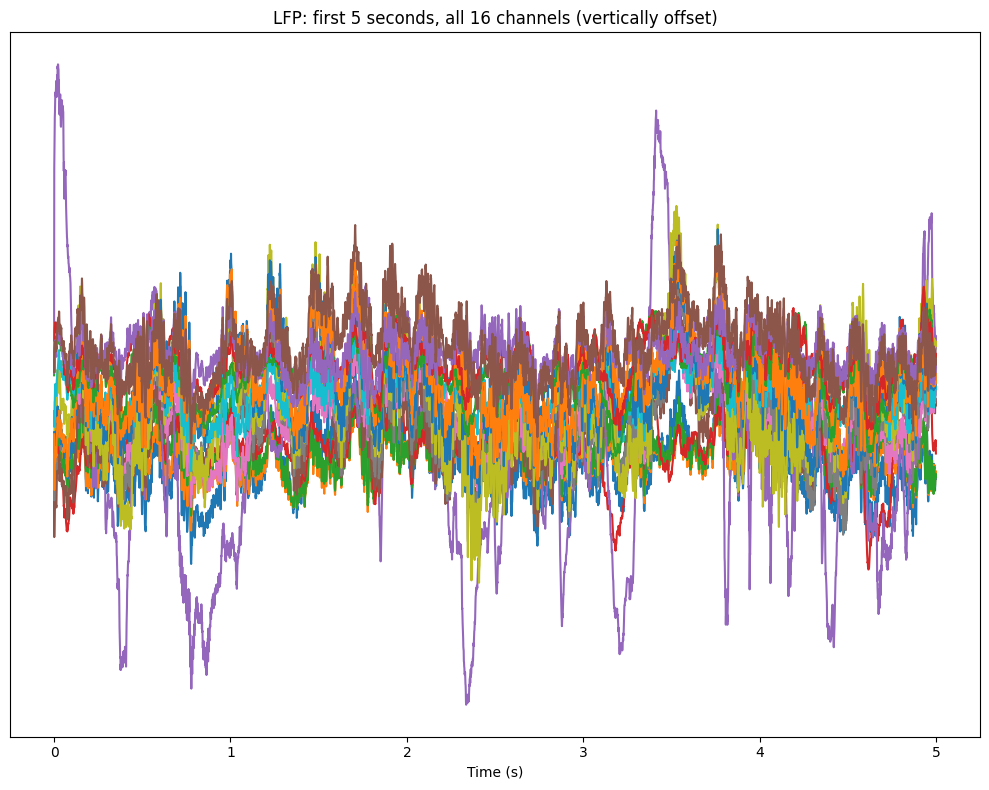

In [4]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = int(nwb.acquisition['LFP'].rate)
segment_samples = 5 * sample_rate  # 5 seconds

lfp_data = nwb.acquisition['LFP'].data[:segment_samples, :]

plt.figure(figsize=(10, 8))
for ch in range(lfp_data.shape[1]):
    plt.plot(np.arange(segment_samples) / sample_rate, lfp_data[:, ch] + ch * 200, label=f'Ch {ch}')
plt.xlabel('Time (s)')
plt.yticks([])
plt.title('LFP: first 5 seconds, all 16 channels (vertically offset)')
plt.tight_layout()
plt.show()

## Visualizing Data: Sniff Signal and Event Times

Next, we overlay inhalation and exhalation event markers on the raw sniff signal. To ensure that events are displayable, we focus on a window starting just before the first inhalation event.


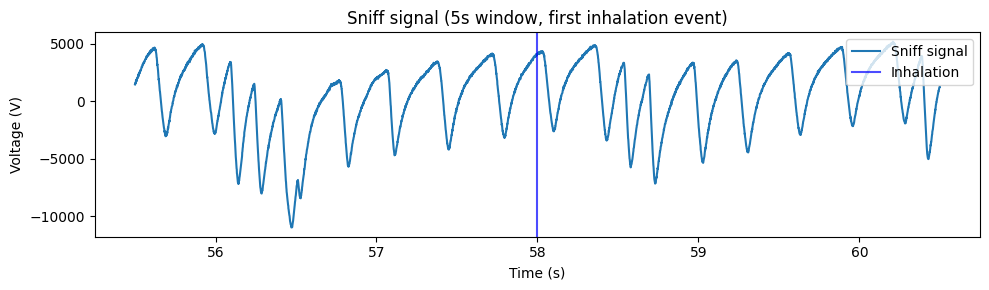

In [5]:
# Get sniff signal segment centered on first inhalation
SniffSignal = nwb.acquisition["SniffSignal"]
sample_rate = int(SniffSignal.rate)
inh = nwb.processing["behavior"].data_interfaces["inhalation_time"]
ex = nwb.processing["behavior"].data_interfaces["exhalation_time"]

inh_t = inh.timestamps[:]
ex_t = ex.timestamps[:]

if len(inh_t) > 0:
    t0 = inh_t[0] - 2.5  # 2.5s before first inhale
    t0 = max(t0, 0)
    t1 = t0 + 5
    idx0 = int(t0 * sample_rate)
    idx1 = int(t1 * sample_rate)
    times = np.arange(idx0, idx1) / sample_rate
    data = SniffSignal.data[idx0:idx1]

    # Select events in window
    inh_t_win = inh_t[(inh_t >= t0) & (inh_t < t1)]
    ex_t_win = ex_t[(ex_t >= t0) & (ex_t < t1)]

    plt.figure(figsize=(10, 3))
    plt.plot(times, data, label="Sniff signal")
    for t in inh_t_win:
        plt.axvline(t, color="b", alpha=0.7, label="Inhalation")
    for t in ex_t_win:
        plt.axvline(t, color="r", alpha=0.7, label="Exhalation")
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="upper right")
    plt.title("Sniff signal (5s window, first inhalation event)")
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.tight_layout()
    plt.show()
else:
    print("No inhalation events found in this session.")

## Summary and Future Directions

This notebook demonstrated how to:
- Programmatically access DANDI datasets and NWB neurophysiology data
- Load session and subject metadata
- Inspect core data structures (LFP, sniff, event times, electrode metadata)
- Visualize raw signals and event timing with examples that can be adapted for deeper analysis

**Possible next steps:**
- Extract signal statistics or perform spectral analysis on LFP or sniff signals
- Analyze the timing or frequency of sniffing events
- Relate LFP patterns to breathing dynamics using intervals between events
- Visualize additional channels or longer data segments, with attention to memory efficiency

For full Dandiset exploration, see [DANDI:001433](https://dandiarchive.org/dandiset/001433/0.250507.2356) or the [NWB file on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=draft).

---

_Notebook generation complete._